## Исследование данных о российском кинопрокате



### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/datasets/mkrf_movies.csv')

**Выведем основную информацию о данных**

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

**Удалим строковое значение в столбце 'puNumber', чтобы избежать ошибки при объединении таблиц.**

In [3]:
print(data.query('puNumber == "нет"')) 

                                  title puNumber           show_start_date  \
1797  Курбан-роман. (История с жертвой)      нет  2014-05-15T12:00:00.000Z   

                type       film_studio production_country director  \
1797  Художественный  ФОНД "ИННОВАЦИЯ"             Россия  С.Юзеев   

        producer                  age_restriction  refundable_support  \
1797  М.Галицкая  «12+» - для детей старше 12 лет                 NaN   

      nonrefundable_support  budget financing_source ratings genres  
1797                    NaN     NaN              NaN     NaN    NaN  


In [4]:
data = data.query('puNumber != "нет"')

In [5]:
data['puNumber'] = data['puNumber'].astype('int')

**Откроем данные data_box_office**

In [6]:
data_box_office = pd.read_csv('/datasets/mkrf_shows.csv')
print(data_box_office.head(10))

    puNumber    box_office
0  111000113  2.450000e+03
1  111000115  6.104000e+04
2  111000116  1.530300e+08
3  111000117  1.226096e+07
4  111000118  1.636841e+08
5  111000119  4.293650e+06
6  111000212  2.000000e+02
7  111000216  3.555670e+05
8  111000313  7.100000e+02
9  111000314  1.607970e+06


In [7]:
data_box_office.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


**Добавим данные data_box_office по общему столбцу 'puNumber'**

In [8]:
data = data.merge(data_box_office, on='puNumber', how = 'left')

In [9]:
print(data)

                                             title   puNumber  \
0                                 Открытый простор  221048915   
1                             Особо важное задание  111013716   
2                                     Особо опасен  221038416   
3                                     Особо опасен  221026916   
4                                     Особо опасен  221030815   
...                                            ...        ...   
7480     Сад художника: Американский импрессионизм  126008019   
7481                               Звериная ярость  121037819   
7482     Щенячий патруль: Скорей спешим на помощь!  124010819   
7483      Машины песенки. Серия "Испанские мотивы"  124010619   
7484  Машины песенки. Серия "Когда цветут кактусы"  124010719   

               show_start_date             type  \
0     2015-11-27T12:00:00.000Z   Художественный   
1     2016-09-13T12:00:00.000Z   Художественный   
2     2016-10-10T12:00:00.000Z   Художественный   
3     2016-06-1

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

**Вывод:** Кроме одной удалённой ручным образом строки, никаких потерь при переносе не произошло

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

**Обязательному изменению типа данных требуют столбцы:**

1) 'show_start_date' (*datetime*)

2) 'ratings' (*float*)

In [12]:
data['show_start_date']= pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S')

In [13]:
print(data['ratings'].unique())

['7.2' '6.6' '6.8' '7.7' '8.3' '8.0' '7.8' '8.1' '7.1' '6.0' '7.4' '5.8'
 '8.7' '6.3' '6.9' '5.0' '4.3' '7.3' '7.0' '6.4' nan '8.2' '7.5' '6.7'
 '7.9' '5.9' '6.2' '5.6' '6.5' '2.4' '7.6' '6.1' '8.6' '8.5' '8.8' '5.5'
 '5.1' '5.7' '5.4' '99%' '4.4' '4.5' '5.3' '4.1' '8.4' '2.6' '3.8' '4.6'
 '4.8' '4.0' '3.0' '1.6' '4.2' '5.2' '4.7' '4.9' '3.9' '2.7' '3.3' '2.9'
 '28%' '3.7' '1.4' '3.1' '97%' '3.5' '3.2' '2.8' '1.5' '2.1' '2.5' '9.2'
 '3.4' '1.1' '3.6' '83%' '64%' '91%' '94%' '62%' '79%' '90%' '19%' '88%'
 '1.0' '89%' '1.3' '1.9' '1.8' '1.2' '1.7' '9.0' '98%' '8.9' '9.1']


In [14]:
data['ratings'] = data['ratings'].str.replace('28%', '2.8') 
data['ratings'] = data['ratings'].str.replace('99%', '9.9') 
data['ratings'] = data['ratings'].str.replace('83%', '8.3') 
data['ratings'] = data['ratings'].str.replace('64%', '6.4') 
data['ratings'] = data['ratings'].str.replace('91%', '9.1') 
data['ratings'] = data['ratings'].str.replace('94%', '9.4') 
data['ratings'] = data['ratings'].str.replace('90%', '9.0') 
data['ratings'] = data['ratings'].str.replace('19%', '1.9') 
data['ratings'] = data['ratings'].str.replace('88%', '8.8')
data['ratings'] = data['ratings'].str.replace('89%', '8.9') 
data['ratings'] = data['ratings'].str.replace('98%', '9.8') 
data['ratings'] = data['ratings'].str.replace('79%', '7.9')
data['ratings'] = data['ratings'].str.replace('97%', '9.7') 
data['ratings'] = data['ratings'].str.replace('62%', '6.2')
print(data['ratings'].unique())

['7.2' '6.6' '6.8' '7.7' '8.3' '8.0' '7.8' '8.1' '7.1' '6.0' '7.4' '5.8'
 '8.7' '6.3' '6.9' '5.0' '4.3' '7.3' '7.0' '6.4' nan '8.2' '7.5' '6.7'
 '7.9' '5.9' '6.2' '5.6' '6.5' '2.4' '7.6' '6.1' '8.6' '8.5' '8.8' '5.5'
 '5.1' '5.7' '5.4' '9.9' '4.4' '4.5' '5.3' '4.1' '8.4' '2.6' '3.8' '4.6'
 '4.8' '4.0' '3.0' '1.6' '4.2' '5.2' '4.7' '4.9' '3.9' '2.7' '3.3' '2.9'
 '2.8' '3.7' '1.4' '3.1' '9.7' '3.5' '3.2' '1.5' '2.1' '2.5' '9.2' '3.4'
 '1.1' '3.6' '9.1' '9.4' '9.0' '1.9' '1.0' '8.9' '1.3' '1.8' '1.2' '1.7'
 '9.8']


In [15]:
data['ratings'] = data['ratings'].astype('float')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7485 non-null   object             
 1   puNumber               7485 non-null   int64              
 2   show_start_date        7485 non-null   datetime64[ns, UTC]
 3   type                   7485 non-null   object             
 4   film_studio            7467 non-null   object             
 5   production_country     7483 non-null   object             
 6   director               7476 non-null   object             
 7   producer               6917 non-null   object             
 8   age_restriction        7485 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [17]:
print(data.isna().sum())

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                    975
box_office               4327
dtype: int64


**Заполнение пропусками в данном массиве данных представляется затруднительным и не особо имеющим смысл, тк большинство данных составляют категориальные значения. Заполнение в пропусках количественных данных не требуется. На аналитическую часть исследования существующие пропуски не повлияют.**


*Можно заполнить два пропуска в стране производства*.

In [18]:
data[data['production_country'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3185,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.0
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


In [19]:
data['film_studio'] = data['film_studio'].fillna('unknown')
data['production_country'] = data['production_country'].fillna('unknown')
data['director'] = data['director'].fillna('unknown')
data['producer'] = data['producer'].fillna('unknown')
data['genres'] = data['genres'].fillna('unknown')
data['budget'] = data['budget'].fillna(0.0)

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7485 non-null   object             
 1   puNumber               7485 non-null   int64              
 2   show_start_date        7485 non-null   datetime64[ns, UTC]
 3   type                   7485 non-null   object             
 4   film_studio            7485 non-null   object             
 5   production_country     7485 non-null   object             
 6   director               7485 non-null   object             
 7   producer               7485 non-null   object             
 8   age_restriction        7485 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 7485 non-null   float64          

In [21]:
data.duplicated().sum()

0

**Вывод:** Явных дубликатов в данных нет

In [22]:
data['title'].duplicated().sum()

714

In [23]:
print(data.query('title == "Волшебная страна."'))

                 title   puNumber           show_start_date          type  \
936  Волшебная страна.  124003016 2016-06-07 12:00:00+00:00  Анимационный   
937  Волшебная страна.  124001113 2013-04-15 12:00:00+00:00  Анимационный   

                              film_studio  \
936  Брейктру Филмз, Эс Эм Бэ Инвестментс   
937  Брейктру Филмз, Эс Эм Бэ Инвестментс   

                                   production_country  \
936  Великобритания - Польша - КНР - Индия - Норвегия   
937  Великобритания - Польша - КНР - Индия - Норвегия   

                                      director                       producer  \
936  Мартин Клэпп, Дорота Кобеля, Джофф Линдси  Магдалена Баргел, Хью Велчман   
937  Мартин Клэпп, Дорота Кобеля, Джофф Линдси  Магдалена Баргел, Хью Велчман   

                 age_restriction  refundable_support  nonrefundable_support  \
936  «18+» - запрещено для детей                 NaN                    NaN   
937  «18+» - запрещено для детей                 NaN      

**Вывод:** Есть дубликаты в столбце **'title'**, но это не является аномальным явлением. Дубликаты в названии объясняются выспуском киноремейков, получением прокатного удостоверения  в разные сроки и для разных прокатных целей.

In [24]:
data['puNumber'].duplicated().sum()

2

In [25]:
data.query('puNumber == 221154310')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,0.0,NaN,7.0,"мелодрама,комедия",NaN
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,0.0,NaN,7.6,"драма,мелодрама,история",NaN


**Посмотрим дубликаты в номерах прокатного удостоверения**

In [26]:
print(f'Количество дубликатов:', len(data[data['puNumber'].duplicated()]))
print(data['puNumber'][data['puNumber'].duplicated()])

Количество дубликатов: 2
4638    221154310
5067    221054410
Name: puNumber, dtype: int64


In [27]:
data.query('puNumber == 221154310')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,0.0,NaN,7.0,"мелодрама,комедия",NaN
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,0.0,NaN,7.6,"драма,мелодрама,история",NaN


In [28]:
data.query('puNumber == 221054410')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5066,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,0.0,NaN,7.4,"комедия,криминал",NaN
5067,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,0.0,NaN,6.8,"комедия,криминал",NaN


**Вывод:** Несмотря на одинаковые номера прокатного удостоверения, фильмы настоящие, поэтому их можно оставить в датафрейме.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

**Общая проблема**, которая была выделена ещё на прошлых этапах, заключается в конкретных значениях и большом количестве таких значений для отдельной характеристики объекта данных. Большинство фильмов сняты в условиях совместного производства разными странами, студиями, режиссёрами, продюссерами. Также фильмы могут иметь разные значения жанров и других характеристик, что, в сокупности всех этих элементов, значительно затрудняет их категоризацию, при условии необходимости её проведения.

При необходимости проведения масштабного исследования с изучением зависмостей между определёнными категориями фильмов, могло потребоваться создание различных функций для категоризации таких данных. Например, для выделения фильмов по студии-производителю, придётся учитывать фильмы не только снятые студией-производителем самостоятельно, но и при совместном участии с другими студиями.

**Исправим проблемные значения в поле *type***

In [29]:
print(data['type'].unique())

['Художественный' 'Анимационный' 'Прочие' 'Документальный'
 'Научно-популярный' ' Художественный' ' Анимационный'
 'Музыкально-развлекательный']


In [30]:
data['type'] = data['type'].str.strip()

In [31]:
print(data['type'].unique())

['Художественный' 'Анимационный' 'Прочие' 'Документальный'
 'Научно-популярный' 'Музыкально-развлекательный']


**Также можно сократить значения в столбце 'age_restriction'**

In [32]:
data['age_restriction'] = data['age_restriction'].str.split(' ',1).str[0]

In [33]:
print(data['age_restriction'].unique())

['«18+»' '«6+»' '«12+»' '«16+»' '«0+»']


#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

                     title   puNumber           show_start_date  \
5436              Матильда  111005717 2017-08-17 12:00:00+00:00   
7113  Тайна Печати Дракона  111012819 2019-09-12 12:00:00+00:00   

                type                                        film_studio  \
5436  Художественный                     ООО "ТПО "РОК", ООО "Матильда"   
7113  Художественный  ООО "Кинокомпания "СТВ"; ООО "РФГ Корп"; ООО "...   

     production_country     director                         producer  \
5436             Россия    А.Учитель  А.Учитель, А.Достман, В.Винокур   
7113       Россия-Китай  О.Степченко           С.Сельянов, А.Петрухин   

     age_restriction  refundable_support  nonrefundable_support        budget  \
5436           «16+»         110000000.0            190000000.0  1.032906e+09   
7113            «6+»         180000000.0             90000000.0  2.305074e+09   

     financing_source  ratings                    genres    box_office  
5436        Фонд кино      7.7  фэн

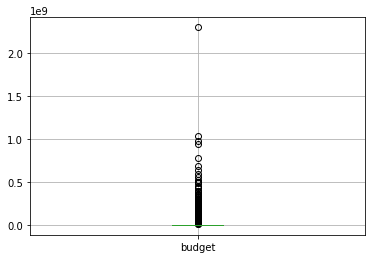

In [34]:
data.boxplot(column='budget')
print(data.query('budget > 1000000000'))

<AxesSubplot:>

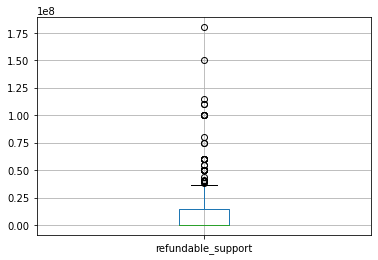

In [35]:
data.boxplot(column='refundable_support')

<AxesSubplot:>

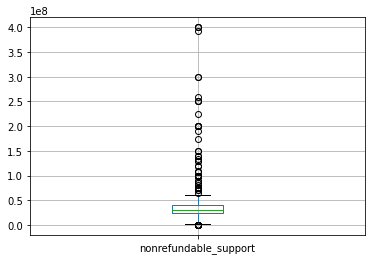

In [36]:
data.boxplot(column='nonrefundable_support')

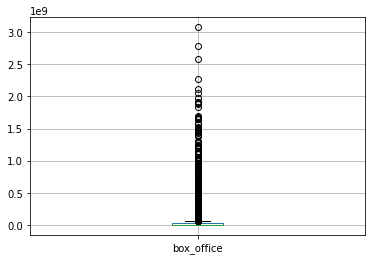

In [37]:
data.boxplot(column='box_office')
plt.show()
data = data.query('box_office.isna() | box_office > 0')

**Вывод:** На первый взгляд, благодаря визуализации диаграмм рассеивания, можно сделать вывод о наличии подозрительных данных. При этом нужно учитывать тему исследования и изучаемых данных. В контексте изучения показателей кинофильмов и их кассовых сборов, выделяющиеся из общей выборки значения свидетельствуют о разной степени финансирования и разном уровне успешности фильмов на российском рынке. Следовательно, такие данные не представляют собой аномалии и не требут удаления.

Сделаем проверку возможности превышения суммы госдураственной поддержки над показателем общего бюджета. 

In [38]:
data['total_support'] = data['refundable_support'] + data['nonrefundable_support']
print(data[(data['budget'])<(data['total_support'])])

                       title   puNumber           show_start_date  \
2052                     14+  111023614 2014-12-19 12:00:00+00:00   
2057               Дуxless 2  111000415 2015-01-26 12:00:00+00:00   
2471             Воин (2015)  111017315 2015-09-28 12:00:00+00:00   
2531                 Бармен.  111009615 2015-05-26 12:00:00+00:00   
2614     Савва. Сердце воина  114001715 2015-07-21 12:00:00+00:00   
2683          Тряпичный союз  111010215 2015-06-08 12:00:00+00:00   
2787      Срочно выйду замуж  111017115 2015-09-30 12:00:00+00:00   
2873       Помню - не помню!  111004916 2016-03-01 12:00:00+00:00   
3046  Любовь с ограничениями  111008216 2016-04-29 12:00:00+00:00   
3564       Притяжение (2016)  111018116 2016-12-16 12:00:00+00:00   
3674                Чудо-юдо  114001817 2017-06-27 12:00:00+00:00   
3738                    Мифы  111004317 2017-06-07 12:00:00+00:00   
5672                   Селфи  111012117 2018-02-01 12:00:00+00:00   
5805              Два хвоста  1140

Можно подтвердить, что такие строчки существуют, т.к. в 17 строках значение общего бюджета не заполнено и равно 0. Заменим нулевые значения указанными значениями объёма средств государственной поддержки. 

In [39]:
def budget_null (row):
    budget = row['budget']
    support = row['total_support']
    if budget == 0.0: 
        return support
    return budget

data['budget'] =  data.apply(budget_null, axis=1)

In [40]:
print(data[(data['budget'])<(data['total_support'])])

Empty DataFrame
Columns: [title, puNumber, show_start_date, type, film_studio, production_country, director, producer, age_restriction, refundable_support, nonrefundable_support, budget, financing_source, ratings, genres, box_office, total_support]
Index: []


Фильмы с бюджетом более миллиарда рублей:
5436                Матильда
7113    Тайна Печати Дракона
Name: title, dtype: object


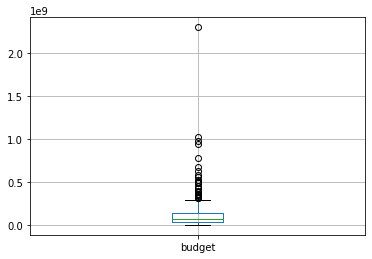

In [41]:
data.boxplot(column='budget')
films_with_top_budget = data.query('budget > 1000000000')
print('Фильмы с бюджетом более миллиарда рублей:')
print(films_with_top_budget['title'])

Фильмы с объёмом возвратных средств государственной поддержки более 100 миллионов:
3163                          Герой (2015)
3350                               Дуэлянт
5436                              Матильда
6471    Три богатыря и наследница престола
7113                  Тайна Печати Дракона
Name: title, dtype: object


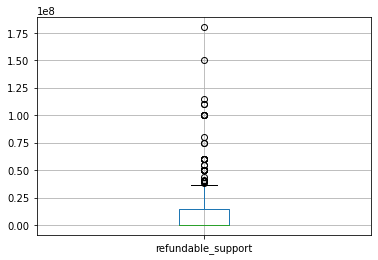

In [42]:
data.boxplot(column='refundable_support')
films_with_top_refundable_support = data.query('refundable_support > 100000000')
print('Фильмы с объёмом возвратных средств государственной поддержки более 100 миллионов:')
print(films_with_top_refundable_support['title'])

Фильмы с объёмом невозвратных средств государственной поддержки более 100 миллионов:
2698                Он - Дракон
2919                   Экипаж .
3254        Время первых (2017)
3350                    Дуэлянт
3452                    Ледокол
3564          Притяжение (2016)
3626                    БОЛЬШОЙ
5436                   Матильда
5501                    Салют-7
5568        Легенда о Коловрате
5652             Движение вверх
5689                      Рубеж
5825                     Тренер
6886                    Девятая
7289    Урфин Джюс возвращается
7463              Союз спасения
7473                  Вторжение
Name: title, dtype: object


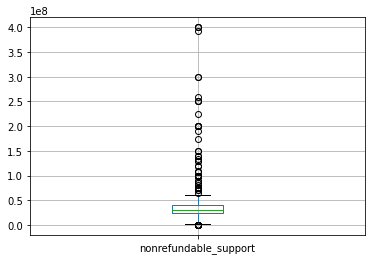

In [43]:
data.boxplot(column='nonrefundable_support')
films_with_top_nonrefundable_support = data.query('nonrefundable_support > 150000000')
print('Фильмы с объёмом невозвратных средств государственной поддержки более 100 миллионов:')
print(films_with_top_nonrefundable_support['title'])

Фильмы с денежными сборами более 2 миллиардов:
2858                                           Зверополис
3487    Пираты Карибского моря: Мертвецы не рассказыва...
5652                                       Движение вверх
6548                                                 Т-34
6819                                      Мстители: Финал
7455                                                Холоп
Name: title, dtype: object


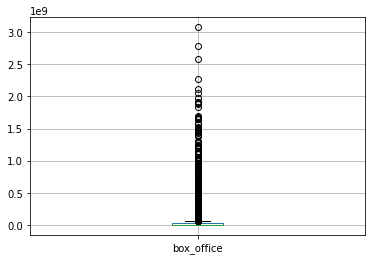

In [44]:
data.boxplot(column='box_office')
films_with_top_box_office = data.query('box_office > 2000000000')
print('Фильмы с денежными сборами более 2 миллиардов:')
print(films_with_top_box_office['title'])

**Вывод:** На боксплотах множество значений, находящихся вне "усов" диаграммы размаха, но они не являются аномалиями.

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [45]:
data['year'] = data['show_start_date'].dt.year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [46]:
data['main_director'] = data['director'].str.split(',',1).str[0]

In [47]:
data['main_genre'] = data['genres'].str.split(',',1).str[0]

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [48]:
data['ratio_budget'] = round((data['refundable_support'] + data['nonrefundable_support']) / data['budget'],2)

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [49]:
years = data['year'].value_counts()
print(len(years))
print(len(data))
print(years.sort_values())

10
7461
2017    505
2012    588
2011    622
2013    625
2015    702
2014    800
2016    817
2018    891
2019    930
2010    981
Name: year, dtype: int64


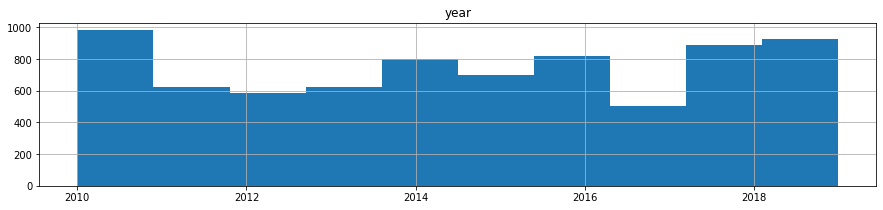

In [50]:
data.hist('year', bins = 10, figsize = (15,3))
plt.show()

**Вывод:** 2017 год оказался наименее продуктивным по числу фильмов в прокате. После пика количества вышедших в прокат фильмов в 2010 году, наблюдаются плавные и переменные скачки показателя.

Посмотрим долю фильмов с указанной информацией о сборах в кинотетарах по каждому году (**2010-2019гг.**)

In [51]:
films_2010 = data.query('year == 2010')
films_2010_box_office = films_2010[films_2010['box_office'].notna()]
print(f'В 2010 году доля фильмов с указанной информацией о сборах в кинотетарах составила:', 
      round(len(films_2010_box_office)/len(films_2010),2))

В 2010 году доля фильмов с указанной информацией о сборах в кинотетарах составила: 0.1


In [52]:
films_2011 = data.query('year == 2011')
films_2011_box_office = films_2011[films_2011['box_office'].notna()]
print(f'В 2011 году доля фильмов с указанной информацией о сборах в кинотетарах составила:', 
      round(len(films_2011_box_office)/len(films_2011),2))

В 2011 году доля фильмов с указанной информацией о сборах в кинотетарах составила: 0.18


In [53]:
films_2012 = data.query('year == 2012')
films_2012_box_office = films_2012[films_2012['box_office'].notna()]
print(f'В 2012 году доля фильмов с указанной информацией о сборах в кинотетарах составила:', 
      round(len(films_2012_box_office)/len(films_2012),2))

В 2012 году доля фильмов с указанной информацией о сборах в кинотетарах составила: 0.21


In [54]:
films_2013 = data.query('year == 2013')
films_2013_box_office = films_2013[films_2013['box_office'].notna()]
print(f'В 2013 году доля фильмов с указанной информацией о сборах в кинотетарах составила:', 
      round(len(films_2013_box_office)/len(films_2013),2))

В 2013 году доля фильмов с указанной информацией о сборах в кинотетарах составила: 0.29


In [55]:
films_2014 = data.query('year == 2014')
films_2014_box_office = films_2014[films_2014['box_office'].notna()]
print(f'В 2014 году доля фильмов с указанной информацией о сборах в кинотетарах составила:', 
      round(len(films_2014_box_office)/len(films_2014),2))

В 2014 году доля фильмов с указанной информацией о сборах в кинотетарах составила: 0.34


In [56]:
films_2015 = data.query('year == 2015')
films_2015_box_office = films_2015[films_2015['box_office'].notna()]
print(f'В 2015 году доля фильмов с указанной информацией о сборах в кинотетарах составила:', 
      round(len(films_2015_box_office)/len(films_2015),2))

В 2015 году доля фильмов с указанной информацией о сборах в кинотетарах составила: 0.66


In [57]:
films_2016 = data.query('year == 2016')
films_2016_box_office = films_2016[films_2016['box_office'].notna()]
print(f'В 2016 году доля фильмов с указанной информацией о сборах в кинотетарах составила:', 
      round(len(films_2016_box_office)/len(films_2016),2))

В 2016 году доля фильмов с указанной информацией о сборах в кинотетарах составила: 0.64


In [58]:
films_2017 = data.query('year == 2017')
films_2017_box_office = films_2017[films_2017['box_office'].notna()]
print(f'В 2017 году доля фильмов с указанной информацией о сборах в кинотетарах составила:', 
      round(len(films_2017_box_office)/len(films_2017),2))

В 2017 году доля фильмов с указанной информацией о сборах в кинотетарах составила: 0.71


In [59]:
films_2018 = data.query('year == 2018')
films_2018_box_office = films_2018[films_2018['box_office'].notna()]
print(f'В 2018 году доля фильмов с указанной информацией о сборах в кинотетарах составила:', 
      round(len(films_2018_box_office)/len(films_2018),2))

В 2018 году доля фильмов с указанной информацией о сборах в кинотетарах составила: 0.53


In [60]:
films_2019 = data.query('year == 2019')
films_2019_box_office = films_2019[films_2019['box_office'].notna()]
print(f'В 2019 году доля фильмов с указанной информацией о сборах в кинотетарах составила:', 
      round(len(films_2019_box_office)/len(films_2019),2))

В 2019 году доля фильмов с указанной информацией о сборах в кинотетарах составила: 0.57


**Вывод:** Можно видеть, что с каждым годом, несмотря на небольшое снижение в **2018-2019гг.**, доля фильмов с указанной информацией о сборах в кинотетарах увеличивается.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [61]:
data_box_office = data.groupby('year')['box_office'].sum()
print(data_box_office.sort_values())

year
2010    2.428654e+06
2012    6.955423e+06
2011    1.410276e+07
2013    2.979971e+07
2014    7.444952e+09
2015    3.949737e+10
2016    4.786630e+10
2019    4.842571e+10
2017    4.856371e+10
2018    4.966840e+10
Name: box_office, dtype: float64


**Вывод:** В 2010 году сумма сборов была минимальной. В 2018 году сумма сборов была максимальной. Из представленного для изучения массива данных можно видеть общую тенденцию увелечения суммы сборов.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [62]:
mean_med_years = data.pivot_table(index = 'year', values = 'box_office', aggfunc = (['median','mean']))
                                  
print(mean_med_years)

           median          mean
       box_office    box_office
year                           
2010     1710.000  2.404608e+04
2011     3000.000  1.293832e+05
2012     6220.000  5.654815e+04
2013     3580.000  1.664788e+05
2014    20400.000  2.727089e+07
2015  5003450.150  8.549213e+07
2016  3915041.020  9.117390e+07
2017  9968340.000  1.360328e+08
2018  8891102.210  1.045651e+08
2019  4627798.345  9.136926e+07


**Вывод:** Медианные и средние значения еще раз показывают, почему на прошлом этапе изучения динамики проката и показателей сбора были получены такие значения. До 2015 года данные содержат большое количество фильмов, спонсируемых государством, но в то же время не выходивишие в массовый прокат. 

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

                   box_office
age_restriction              
«0+»             3.790546e+08
«18+»            5.432308e+09
«6+»             8.701799e+09
«16+»            1.136812e+10
«12+»            1.361608e+10


<AxesSubplot:xlabel='age_restriction'>

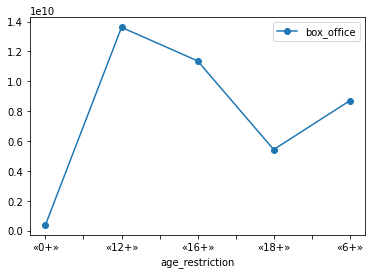

In [63]:
age_restriction_2015 = films_2015.pivot_table(index = 'age_restriction', values = 'box_office', aggfunc = 'sum')

print(age_restriction_2015.sort_values(by = 'box_office'))

age_restriction_2015.plot(style='o-')

                   box_office
age_restriction              
«0+»             1.502288e+08
«18+»            6.793930e+09
«6+»             1.205315e+10
«12+»            1.220445e+10
«16+»            1.666455e+10


<AxesSubplot:xlabel='age_restriction'>

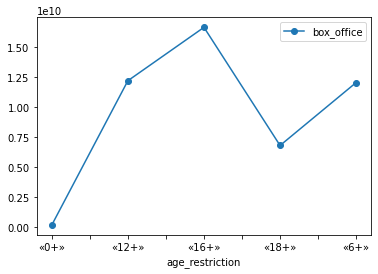

In [64]:
age_restriction_2016 = films_2016.pivot_table(index = 'age_restriction', values = 'box_office', aggfunc = 'sum')

print(age_restriction_2016.sort_values(by = 'box_office'))

age_restriction_2016.plot(style='o-')

                   box_office
age_restriction              
«0+»             2.295989e+08
«12+»            7.851428e+09
«18+»            9.651496e+09
«6+»             1.208614e+10
«16+»            1.874504e+10


<AxesSubplot:xlabel='age_restriction'>

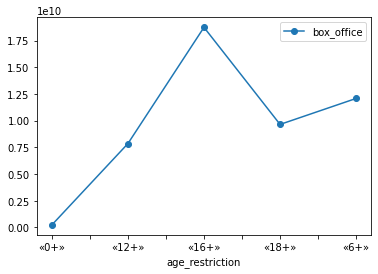

In [65]:
age_restriction_2017 = films_2017.pivot_table(index = 'age_restriction', values = 'box_office', aggfunc = 'sum')

print(age_restriction_2017.sort_values(by = 'box_office'))

age_restriction_2017.plot(style='o-')

                   box_office
age_restriction              
«0+»             3.244900e+07
«18+»            8.760086e+09
«6+»             1.010497e+10
«12+»            1.426729e+10
«16+»            1.650360e+10


<AxesSubplot:xlabel='age_restriction'>

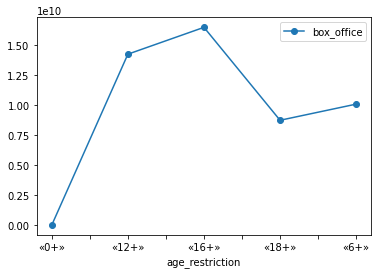

In [66]:
age_restriction_2018 = films_2018.pivot_table(index = 'age_restriction', values = 'box_office', aggfunc = 'sum')

print(age_restriction_2018.sort_values(by = 'box_office'))

age_restriction_2018.plot(style='o-')

                   box_office
age_restriction              
«0+»             1.774607e+07
«18+»            1.012180e+10
«12+»            1.268020e+10
«16+»            1.275342e+10
«6+»             1.285255e+10


<AxesSubplot:xlabel='age_restriction'>

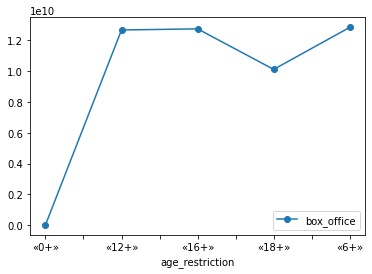

In [67]:
age_restriction_2019 = films_2019.pivot_table(index = 'age_restriction', values = 'box_office', aggfunc = 'sum')

print(age_restriction_2019.sort_values(by = 'box_office'))

age_restriction_2019.plot(style='o-')

**Вывод:** За период 2015-2019 гг. можно видеть, что фильмы с ограничением 12+ и 16+, расчитанные на массовую аудиторию, собирают больше всего денег в прокате. В то же время фильмы с ограничением 18+ и, особенно, 0+, расчитанные на более конкретную аудиторию, набирают значительно меньше. График по годам практически не меняется, а отдельные наблюдаемые пики объяснимы отдельными успешными фильмами. 

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

**Посмотрим сколько выделяет денежных средств Фонд кино и Министерство культуры** 

In [68]:
fond_kino = data.query('financing_source == "Фонд кино"')

fond_kino_total_support = pd.DataFrame()
fond_kino_max_film_support = pd.DataFrame()

ministry = data.query('financing_source == "Министерство культуры"')

ministry_total_support = pd.DataFrame()
ministry_max_film_support = pd.DataFrame()

**Посчитаем все выделенные Фондом кино денежные средства за 2010-2019 гг.**

In [69]:
print(f'Объём возвратных средств Фонда Кино:', fond_kino['refundable_support'].sum())

print(f'Объём невозвратных средств Фонда Кино:', fond_kino['nonrefundable_support'].sum())      
      
print(f'Объём всех выделенных средств Фонда Кино:', fond_kino['total_support'].sum())

print(f'Доля невозвратных средств Фонда Кино:', round((fond_kino['nonrefundable_support'].sum())/(fond_kino['total_support'].sum()),2))

Объём возвратных средств Фонда Кино: 3613500000.0
Объём невозвратных средств Фонда Кино: 10565095958.0
Объём всех выделенных средств Фонда Кино: 14178595958.0
Доля невозвратных средств Фонда Кино: 0.75


**Вывод:** Процент невозвратных средств Фонда Кино за период 2010-2019 гг. составил **75%**

In [70]:
print(f'Объём возвратных средств Министерства культуры:', ministry['refundable_support'].sum())

print(f'Объём невозвратных средств Министерства культуры:', ministry['nonrefundable_support'].sum())      
      
print(f'Объём всех выделенных средств Фонда Кино:', ministry['total_support'].sum())

Объём возвратных средств Министерства культуры: 0.0
Объём невозвратных средств Министерства культуры: 4836661000.0
Объём всех выделенных средств Фонда Кино: 4836661000.0


**Вывод:** Министерство культуры выделяет средства только на безвозмедной основе.

In [71]:
corr_rating_support_fond_kino = fond_kino[['total_support', 'ratings']]
print(corr_rating_support_fond_kino.corr())

               total_support   ratings
total_support       1.000000  0.253291
ratings             0.253291  1.000000


**Вывод:** Слабая положительная корреляция между объёмом выделяемых Фондом Кино денежных средств поддержки и рейтингом фильмов.

In [72]:
corr_rating_support_ministry = ministry[['total_support', 'ratings']]
print(corr_rating_support_ministry.corr())

               total_support   ratings
total_support       1.000000 -0.009291
ratings            -0.009291  1.000000


**Вывод:** Корреляция ниже и отсутствует между объёмом выделяемых Министерством культуры денежных средств поддержки и рейтингом фильмов.

In [73]:
corr_box_support_fond_kino = fond_kino[['total_support', 'box_office']]
print(corr_box_support_fond_kino.corr())

               total_support  box_office
total_support       1.000000    0.420953
box_office          0.420953    1.000000


**Вывод:** Умеренная положительная корреляция между объёмом выделяемых Фондом Кино денежных средств поддержки и сборами в прокате.

In [74]:
corr_box_support_ministry = ministry[['total_support', 'box_office']]
print(corr_box_support_ministry.corr())

               total_support  box_office
total_support       1.000000    0.211749
box_office          0.211749    1.000000


**Вывод:** Слабая положительная корреляция между объёмом выделяемых Министерством денежных средств поддержки и сборами в прокате.

**Изучим сумму выделенных Фондом кино средств поддержки по каждому году и наиболее спонсируемые фильмы в определённый год (2010-2019 гг.)** 

In [75]:
fond_kino_2010 = fond_kino.query('year == 2010')   
      
print('Общая сумма выделенных Фондом кино средств в 2010 году составило:',
      fond_kino_2010['total_support'].sum())

Общая сумма выделенных Фондом кино средств в 2010 году составило: 0.0


In [76]:
fond_kino_2011 = fond_kino.query('year == 2011')   
      
print('Общая сумма выделенных Фондом кино средств в 2011 году составило:',
      fond_kino_2011['total_support'].sum())

Общая сумма выделенных Фондом кино средств в 2011 году составило: 0.0


In [77]:
fond_kino_2012 = fond_kino.query('year == 2012')   
      
print('Общая сумма выделенных Фондом кино средств в 2012 году составило:',
      fond_kino_2012['total_support'].sum())

Общая сумма выделенных Фондом кино средств в 2012 году составило: 0.0


In [78]:
fond_kino_2013 = fond_kino.query('year == 2013')   

fond_kino_2013_total_support = fond_kino_2013.pivot_table(index = 'year', values = 'total_support', aggfunc = 'sum')

print('Общая сумма выделенных Фондом кино средств в 2013 году составило:',
      fond_kino_2013_total_support.loc[:,'total_support'])

fond_kino_total_support = fond_kino_total_support.append(fond_kino_2013_total_support)

print('')

fond_kino_max_film_support_2013 = fond_kino_2013[fond_kino_2013['total_support']==fond_kino_2013['total_support'].max()]

fond_kino_max_film_support = fond_kino_max_film_support.append(fond_kino_max_film_support_2013)  

print('Наиболее спонсируемый фильм:')
print(fond_kino_max_film_support_2013['title'])

Общая сумма выделенных Фондом кино средств в 2013 году составило: year
2013    107847945.0
Name: total_support, dtype: float64

Наиболее спонсируемый фильм:
1498    Невидимки
Name: title, dtype: object


In [79]:
fond_kino_2014 = fond_kino.query('year == 2014')   

fond_kino_2014_total_support = fond_kino_2014.pivot_table(index = 'year', values = 'total_support', aggfunc = 'sum')

print('Общая сумма выделенных Фондом кино средств в 2014 году составило:',
      fond_kino_2014_total_support.loc[:,'total_support'])

fond_kino_total_support = fond_kino_total_support.append(fond_kino_2014_total_support)

print('')

fond_kino_max_film_support_2014 = fond_kino_2014[fond_kino_2014['total_support']==fond_kino_2014['total_support'].max()]

fond_kino_max_film_support = fond_kino_max_film_support.append(fond_kino_max_film_support_2014)  

print('Наиболее спонсируемый фильм:')

print(fond_kino_max_film_support_2014['title'])

Общая сумма выделенных Фондом кино средств в 2014 году составило: year
2014    201000000.0
Name: total_support, dtype: float64

Наиболее спонсируемый фильм:
2004    Снежная Королева 2: Перезаморозка
Name: title, dtype: object


In [80]:
fond_kino_2015 = fond_kino.query('year == 2015')   

fond_kino_2015_total_support = fond_kino_2015.pivot_table(index = 'year', values = 'total_support', aggfunc = 'sum')

print('Общая сумма выделенных Фондом кино средств в 2015 году составило:',
      fond_kino_2015_total_support.loc[:,'total_support'])

fond_kino_total_support = fond_kino_total_support.append(fond_kino_2015_total_support)

print('')

fond_kino_max_film_support_2015 = fond_kino_2015[fond_kino_2015['total_support']==fond_kino_2015['total_support'].max()]

fond_kino_max_film_support = fond_kino_max_film_support.append(fond_kino_max_film_support_2015)  

print('Наиболее спонсируемый фильм:')

print(fond_kino_max_film_support_2015['title'])

Общая сумма выделенных Фондом кино средств в 2015 году составило: year
2015    2.236049e+09
Name: total_support, dtype: float64

Наиболее спонсируемый фильм:
2698    Он - Дракон
Name: title, dtype: object


In [81]:
fond_kino_2016 = fond_kino.query('year == 2016')   

fond_kino_2016_total_support = fond_kino_2016.pivot_table(index = 'year', values = 'total_support', aggfunc = 'sum')

print('Общая сумма выделенных Фондом кино средств в 2016 году составило:',
      fond_kino_2016_total_support.loc[:,'total_support'])

fond_kino_total_support = fond_kino_total_support.append(fond_kino_2016_total_support)

print('')

fond_kino_max_film_support_2016 = fond_kino_2016[fond_kino_2016['total_support']==fond_kino_2016['total_support'].max()]

fond_kino_max_film_support = fond_kino_max_film_support.append(fond_kino_max_film_support_2016)  

print('Наиболее спонсируемый фильм:')

print(fond_kino_max_film_support_2016['title'])

Общая сумма выделенных Фондом кино средств в 2016 году составило: year
2016    3.084104e+09
Name: total_support, dtype: float64

Наиболее спонсируемый фильм:
3350    Дуэлянт
Name: title, dtype: object


In [82]:
fond_kino_2017 = fond_kino.query('year == 2017')   

fond_kino_2017_total_support = fond_kino_2017.pivot_table(index = 'year', values = 'total_support', aggfunc = 'sum')

print('Общая сумма выделенных Фондом кино средств в 2017 году составило:',
      fond_kino_2017_total_support.loc[:,'total_support'])

fond_kino_total_support = fond_kino_total_support.append(fond_kino_2017_total_support)

print('')

fond_kino_max_film_support_2017 = fond_kino_2017[fond_kino_2017['total_support']==fond_kino_2017['total_support'].max()]

fond_kino_max_film_support = fond_kino_max_film_support.append(fond_kino_max_film_support_2017)  

print('Наиболее спонсируемый фильм:')

print(fond_kino_max_film_support_2017['title'])

Общая сумма выделенных Фондом кино средств в 2017 году составило: year
2017    2.768625e+09
Name: total_support, dtype: float64

Наиболее спонсируемый фильм:
5652    Движение вверх
Name: title, dtype: object


In [83]:
fond_kino_2018 = fond_kino.query('year == 2018')   

fond_kino_2018_total_support = fond_kino_2018.pivot_table(index = 'year', values = 'total_support', aggfunc = 'sum')

print('Общая сумма выделенных Фондом кино средств в 2018 году составило:',
      fond_kino_2018_total_support.loc[:,'total_support'])

fond_kino_total_support = fond_kino_total_support.append(fond_kino_2018_total_support)

print('')

fond_kino_max_film_support_2018 = fond_kino_2018[fond_kino_2018['total_support']==fond_kino_2018['total_support'].max()]

fond_kino_max_film_support = fond_kino_max_film_support.append(fond_kino_max_film_support_2018)  

print('Наиболее спонсируемый фильм:')

print(fond_kino_max_film_support_2018['title'])

Общая сумма выделенных Фондом кино средств в 2018 году составило: year
2018    2.465969e+09
Name: total_support, dtype: float64

Наиболее спонсируемый фильм:
5825    Тренер
Name: title, dtype: object


In [84]:
fond_kino_2019 = fond_kino.query('year == 2019')   

fond_kino_2019_total_support = fond_kino_2019.pivot_table(index = 'year', values = 'total_support', aggfunc = 'sum')

print('Общая сумма выделенных Фондом кино средств в 2019 году составило:',
      fond_kino_2019_total_support.loc[:,'total_support'])

fond_kino_total_support = fond_kino_total_support.append(fond_kino_2019_total_support)

print('')

fond_kino_max_film_support_2019 = fond_kino_2019[fond_kino_2019['total_support']==fond_kino_2019['total_support'].max()]

fond_kino_max_film_support = fond_kino_max_film_support.append(fond_kino_max_film_support_2019)  

print('Наиболее спонсируемые фильмы:')

print(fond_kino_max_film_support_2019['title'])

Общая сумма выделенных Фондом кино средств в 2019 году составило: year
2019    3.315000e+09
Name: total_support, dtype: float64

Наиболее спонсируемые фильмы:
7463    Союз спасения
7473        Вторжение
Name: title, dtype: object


      total_support
year               
2013   1.078479e+08
2014   2.010000e+08
2015   2.236049e+09
2016   3.084104e+09
2017   2.768625e+09
2018   2.465969e+09
2019   3.315000e+09


<AxesSubplot:xlabel='year'>

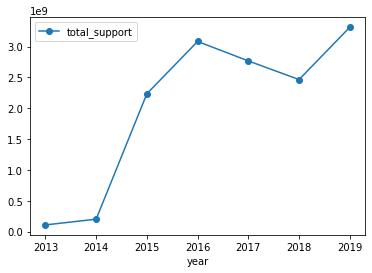

In [85]:
print(fond_kino_total_support)
fond_kino_total_support.plot(style='o-')

**Вывод:** Можно видеть, что сумма веделенных Фондом Кино денежных средств поддержки имеют тенденцию к увелечению, несмотря на наблюдаемое падение в 2017-2018 гг.

In [86]:
print(fond_kino_max_film_support[['title','ratings','year','total_support']].sort_values(by = 'ratings'))

                                  title  ratings  year  total_support
1498                          Невидимки      5.3  2013    107847945.0
7473                          Вторжение      5.7  2019    500000000.0
7463                      Союз спасения      6.0  2019    500000000.0
2004  Снежная Королева 2: Перезаморозка      6.5  2014     70000000.0
3350                            Дуэлянт      6.6  2016    450000000.0
2698                        Он - Дракон      6.8  2015    250000000.0
5825                             Тренер      6.8  2018    260000000.0
5652                     Движение вверх      7.5  2017    400000000.0


**Вывод:** Из всех наиболее спонсируемых Фондом кино фильмов по годам только один фильм имеет рейтинг выше 7.0

**Изучим сумму выделенных Министерством культуры средств поддержки по каждому году и наиболее спонсируемые фильмы в определённый год (2010-2019 гг.)**

In [87]:
ministry_2010 = ministry.query('year == 2010')   

ministry_2010_total_support = ministry_2010.pivot_table(index = 'year', values = 'total_support', aggfunc = 'sum')

print('Данных о выделенных Министерством культуры средств в 2010 году:',
      len(ministry_2010_total_support))

Данных о выделенных Министерством культуры средств в 2010 году: 0


In [88]:
ministry_2011 = ministry.query('year == 2011')   

ministry_2011_total_support = ministry_2011.pivot_table(index = 'year', values = 'total_support', aggfunc = 'sum')

print('Данных о выделенных Министерством культуры средств в 2011 году:',
      len(ministry_2011_total_support))

Данных о выделенных Министерством культуры средств в 2011 году: 0


In [89]:
ministry_2012 = ministry.query('year == 2012')   

ministry_2012_total_support = ministry_2012.pivot_table(index = 'year', values = 'total_support', aggfunc = 'sum')

print('Данных о выделенных Министерством культуры средств в 2012 году:',
      len(ministry_2012_total_support))

Данных о выделенных Министерством культуры средств в 2012 году: 0


In [90]:
ministry_2013 = ministry.query('year == 2013')   

ministry_2013_total_support = ministry_2013.pivot_table(index = 'year', values = 'total_support', aggfunc = 'sum')

print('Общая сумма выделенных Министерством культуры средств в 2013 году составило:',
      ministry_2013_total_support.loc[:,'total_support'])

ministry_total_support = ministry_total_support.append(ministry_2013_total_support)

print('')

ministry_max_film_support_2013 = ministry_2013[ministry_2013['total_support']==ministry_2013['total_support'].max()]

ministry_max_film_support = ministry_max_film_support.append(ministry_max_film_support_2013)  

print('Наиболее спонсируемый фильм:')

print(ministry_max_film_support_2013['title'])

Общая сумма выделенных Министерством культуры средств в 2013 году составило: year
2013    26500000.0
Name: total_support, dtype: float64

Наиболее спонсируемый фильм:
1281    Пока еще жива
Name: title, dtype: object


In [91]:
ministry_2014 = ministry.query('year == 2014')   

ministry_2014_total_support = ministry_2014.pivot_table(index = 'year', values = 'total_support', aggfunc = 'sum')

print('Общая сумма выделенных Фондом кино средств в 2014 году составило:',
      ministry_2014_total_support.loc[:,'total_support'])

ministry_total_support = ministry_total_support.append(ministry_2014_total_support)

print('')

ministry_max_film_support_2014 = ministry_2014[ministry_2014['total_support']==ministry_2014['total_support'].max()]

ministry_max_film_support = ministry_max_film_support.append(ministry_max_film_support_2014)  

print('Наиболее спонсируемые фильмы:')

print(ministry_max_film_support_2014['title'])

Общая сумма выделенных Фондом кино средств в 2014 году составило: year
2014    211500000.0
Name: total_support, dtype: float64

Наиболее спонсируемые фильмы:
1524                 БЕРЦЫ
2013    Дедушка моей мечты
2379      Ангелы Революции
Name: title, dtype: object


In [92]:
ministry_2015 = ministry.query('year == 2015')   

ministry_2015_total_support = ministry_2015.pivot_table(index = 'year', values = 'total_support', aggfunc = 'sum')

print('Общая сумма выделенных Фондом кино средств в 2015 году составило:',
      ministry_2015_total_support.loc[:,'total_support'])

ministry_total_support = ministry_total_support.append(ministry_2015_total_support)

print('')

ministry_max_film_support_2015 = ministry_2015[ministry_2015['total_support']==ministry_2015['total_support'].max()]

ministry_max_film_support = ministry_max_film_support.append(ministry_max_film_support_2015)  

print('Наиболее спонсируемый фильм:')

print(ministry_max_film_support_2015['title'])

Общая сумма выделенных Фондом кино средств в 2015 году составило: year
2015    1.100810e+09
Name: total_support, dtype: float64

Наиболее спонсируемый фильм:
2568    Единичка.
Name: title, dtype: object


In [93]:
ministry_2016 = ministry.query('year == 2016')   

ministry_2016_total_support = ministry_2016.pivot_table(index = 'year', values = 'total_support', aggfunc = 'sum')

print('Общая сумма выделенных Фондом кино средств в 2016 году составило:',
      ministry_2016_total_support.loc[:,'total_support'])

ministry_total_support = ministry_total_support.append(ministry_2016_total_support)

print('')

ministry_max_film_support_2016 = ministry_2016[ministry_2016['total_support']==ministry_2016['total_support'].max()]

ministry_max_film_support = ministry_max_film_support.append(ministry_max_film_support_2016)  

print('Наиболее спонсируемый фильм:')

print(ministry_max_film_support_2016['title'])

Общая сумма выделенных Фондом кино средств в 2016 году составило: year
2016    749851000.0
Name: total_support, dtype: float64

Наиболее спонсируемый фильм:
3045    Опасные каникулы
Name: title, dtype: object


In [94]:
ministry_2017 = ministry.query('year == 2017')   

ministry_2017_total_support = ministry_2017.pivot_table(index = 'year', values = 'total_support', aggfunc = 'sum')

print('Общая сумма выделенных Фондом кино средств в 2017 году составило:',
      ministry_2017_total_support.loc[:,'total_support'])

ministry_total_support = ministry_total_support.append(ministry_2017_total_support)

print('')

ministry_max_film_support_2017 = ministry_2017[ministry_2017['total_support']==ministry_2017['total_support'].max()]

ministry_max_film_support = ministry_max_film_support.append(ministry_max_film_support_2017)  

print('Наиболее спонсируемый фильм:')

print(ministry_max_film_support_2017['title'])

Общая сумма выделенных Фондом кино средств в 2017 году составило: year
2017    351000000.0
Name: total_support, dtype: float64

Наиболее спонсируемый фильм:
3708    Спасти Пушкина
Name: title, dtype: object


In [95]:
ministry_2018 = ministry.query('year == 2018')   

ministry_2018_total_support = ministry_2018.pivot_table(index = 'year', values = 'total_support', aggfunc = 'sum')

print('Общая сумма выделенных Фондом кино средств в 2018 году составило:',
      ministry_2018_total_support.loc[:,'total_support'])

ministry_total_support = ministry_total_support.append(ministry_2018_total_support)

print('')

ministry_max_film_support_2018 = ministry_2018[ministry_2018['total_support']==ministry_2018['total_support'].max()]

ministry_max_film_support = ministry_max_film_support.append(ministry_max_film_support_2018)  

print('Наиболее спонсируемые фильмы:')

print(ministry_max_film_support_2018['title'])

Общая сумма выделенных Фондом кино средств в 2018 году составило: year
2018    926000000.0
Name: total_support, dtype: float64

Наиболее спонсируемые фильмы:
5803                Танки
5807     ДВА БИЛЕТА ДОМОЙ
5851    СОБИБОР (SOBIBOR)
Name: title, dtype: object


In [96]:
ministry_2019 = ministry.query('year == 2019')   

ministry_2019_total_support = ministry_2019.pivot_table(index = 'year', values = 'total_support', aggfunc = 'sum')

print('Общая сумма выделенных Фондом кино средств в 2019 году составило:',
      ministry_2019_total_support.loc[:,'total_support'])

ministry_total_support = ministry_total_support.append(ministry_2019_total_support)

print('')

ministry_max_film_support_2019 = ministry_2019[ministry_2019['total_support']==ministry_2019['total_support'].max()]

ministry_max_film_support = ministry_max_film_support.append(ministry_max_film_support_2019)  

print('Наиболее спонсируемый фильм:')

print(ministry_max_film_support_2019['title'])

Общая сумма выделенных Фондом кино средств в 2019 году составило: year
2019    1.471000e+09
Name: total_support, dtype: float64

Наиболее спонсируемый фильм:
6988    Одесса
Name: title, dtype: object


      total_support
year               
2013   2.650000e+07
2014   2.115000e+08
2015   1.100810e+09
2016   7.498510e+08
2017   3.510000e+08
2018   9.260000e+08
2019   1.471000e+09


<AxesSubplot:xlabel='year'>

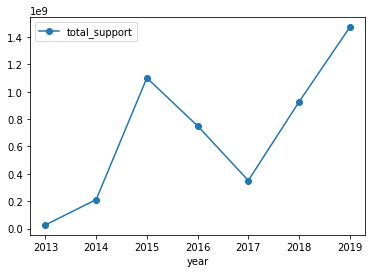

In [97]:
print(ministry_total_support)
ministry_total_support.plot(style='o-')

**Вывод:** Можно видеть, что сумма веделенных Министерством культуры денежных средств поддержки имеют тенденцию к увелечению, несмотря на наблюдаемое падение в 2016-2017 гг.

In [98]:
print(ministry_max_film_support[['title','ratings','year','total_support']].sort_values(by = 'ratings'))

                   title  ratings  year  total_support
3708      Спасти Пушкина      2.9  2017     40000000.0
1524               БЕРЦЫ      4.2  2014     28000000.0
3045    Опасные каникулы      4.8  2016     40000000.0
2013  Дедушка моей мечты      5.7  2014     28000000.0
5803               Танки      5.7  2018     60000000.0
2379    Ангелы Революции      6.4  2014     28000000.0
5851   СОБИБОР (SOBIBOR)      6.4  2018     60000000.0
6988              Одесса      6.4  2019     70000000.0
5807    ДВА БИЛЕТА ДОМОЙ      6.5  2018     60000000.0
2568           Единичка.      6.7  2015     50000000.0
1281       Пока еще жива      8.1  2013     26500000.0


**Вывод:** Из всех наиболее спонсируемых Министерством культуры фильмов по годам только один фильм имеет рейтинг выше 7.0

**Совместное финансирование фильмов Фондом кино и Министерством культуры**

In [99]:
ministry_fond_kino = data.query('financing_source == "Министерство культуры, Фонд кино"')
print(f'Совместно спонсируемых Министерством культуры и Фондом кино фильмов:', len(ministry_fond_kino))


Совместно спонсируемых Министерством культуры и Фондом кино фильмов: 22


In [100]:
print(f'Объём возвратных средств поддержки:', ministry_fond_kino['refundable_support'].sum())

print(f'Объём невозвратных средств поддержки:', ministry_fond_kino['nonrefundable_support'].sum())      
      
print(f'Объём всех выделенных средств поддержки:',ministry_fond_kino['total_support'].sum())

print(f'Доля невозвратных средств:', round((ministry_fond_kino['nonrefundable_support'].sum())/(ministry_fond_kino['total_support'].sum()),2))

Объём возвратных средств поддержки: 325500000.0
Объём невозвратных средств поддержки: 859931354.0
Объём всех выделенных средств поддержки: 1185431354.0
Доля невозвратных средств: 0.73


In [101]:
corr_rating_support_ministry_fond_kino = ministry_fond_kino[['total_support', 'ratings']]
print(corr_rating_support_ministry_fond_kino.corr())

               total_support   ratings
total_support       1.000000  0.030646
ratings             0.030646  1.000000


**Вывод:** Слабая положительная корреляция между объёмом выделяемых денежных средств поддержки и рейтингом фильмов.

In [102]:
corr_rating_support_ministry_fond_kino = ministry_fond_kino[['total_support', 'box_office']]
print(corr_rating_support_ministry_fond_kino.corr())

               total_support  box_office
total_support       1.000000    0.201703
box_office          0.201703    1.000000


**Вывод:** Слабая положительная корреляция между объёмом выделяемых денежных средств поддержки и сборами в прокате.

### Шаг 5. Напишите общий вывод

Было проведёно исследование данных, опубликованных на портале открытых данных Министерства культуры РФ.

На ***первом этапе исследования*** были проанализированы первоначальные, необработанные данные и объединены в один общий датафрейм. 


На ***втором этапе исследования*** была проведена предобработка данных. Проведена предобработка данных, в ходе которой были изменены типы данных в столбцах **'show_start_date'** (datetime) и **'ratings'** (float). 

Изучены пропуски в датафрейме, но заполнение пропусками в данном массиве данных представляется затруднительным и не особо имеющим смысл, т.к. большинство данных составляют категориальные значения. На аналитическую часть исследования существующие пропуски не повлияли.

При проверке на дубликаты явных дубликатов-строк не было обнаружно. Обнаруженны дубликаты в названии фильмов и номерах прокатного удостоверения не имеют аномальную природу и обсуловлены, скорее всего, человеческим фактором.

При изучении категориальных значений были исправлены проблемные значения в **'type'**, **'age_restriction'** и была выделена общая проблема, заключающаяся в конкретных значениях и большом количестве таких значений для отдельной характеристики объекта данных. Большинство фильмов сняты в условиях совместного производства разными странами, студиями, режиссёрами, продюссерами. Также фильмы могут иметь разные значения жанров и других характеристик, что, в сокупности всех этих элементов, значительно затрудняет их категоризацию, при условии необходимости её проведения.

При необходимости проведения масштабного исследования с изучением зависмостей между определёнными категориями фильмов, могло потребоваться создание различных функций для категоризации таких данных. Например, для выделения фильмов по студии-производителю, придётся учитывать фильмы не только снятые студией-производителем самостоятельно, но и при совместном участии с другими студиями. В данном исследовании такая категоризация не потребовалась. 

При проверке количественных значений не было обнаружено подозрительных данных, т.к. в контексте изучения показателей кинофильмов и их кассовых сборов, выделяющиеся из общей выборки значения свидетельствуют о разной степени финансирования и разном уровне успешности фильмов на российском рынке. Следовательно, такие данные не представляют собой аномалии и не требовали удаления.

На ***третьем этапе исследования*** было проведено улучшение данных и добавлены новые столбцы. На основе ранее обработанных данных посчитаны значения и добавлены следующие столбцы: столбцы с информацией о годе проката, именем и фамилией главного режиссёра, основным жанром фильма и долей государственной поддержки от общего бюджета фильма

На ***четвёртом этапе исследования*** был проведён исследовательский анализ обработанных данных. 

При изучении параметров зарегестрированных и выпущенных в прокат фильмов (2010-2019 гг.) выявлены и определены следующие ****особенности и тренды рынка российского кинопроката****:

- **2017** год оказался наименее продуктивным по числу фильмов в прокате. C **2011** года, после пика количества вышедших в прокат фильмов в **2010** году, наблюдается тенденция по увелечению числа фильмов в прокате.
- C каждым годом, несмотря на небольшое снижение в **2018-2019гг.**, доля фильмов с указанной информацией о сборах в кинотетарах увеличивается.
- В **2010** году сумма сборов была минимальной. В **2018** году сумма сборов была максимальной. Наблюдается общая тенденция увелечения суммы сборов.
- Фильмы с ограничением **12+** и **16+**, расчитанные на массовую аудиторию, собирают больше всего денег в прокате. В то же время фильмы с ограничением **18+** и, особенно, **0+**, расчитанные на более конкретную аудиторию, набирают значительно меньше.

****Особенности государственной поддержки российского кинематографа**** 

*Фонд кино:*
- Процент невозвратных средств Фонда Кино за период **2010-2019 гг.** составляет **75%**.
- Слабая положительная корреляция между объёмом выделяемых Фондом Кино денежных средств поддержки и рейтингом фильмов (**corr: 0.25**).
- Умеренная положительная корреляция между объёмом выделяемых Фондом Кино денежных средств поддержки и сборами в прокате (**corr: 0.42**).
- С **2013** года сумма веделенных Фондом Кино денежных средств поддержки имеют тенденцию к увелечению, несмотря на наблюдаемое падение в **2017-2018 гг**.
- Из всех наиболее спонсируемых Фондом кино фильмов по годам только один фильм (**'Движение вверх'**) имеет рейтинг выше **7.0**.

*Министерство культуры:*
- Министерство культуры выделяет средства только на безвозмедной основе.
- Отсутствуе корреляции между объёмом выделяемых Министерством культуры денежных средств поддержки и рейтингом фильмов (**corr: -0.009**).
- Слабая положительная корреляция между объёмом выделяемых Министерством денежных средств поддержки и сборами в прокате (**corr: 0.21**).
- C **2013** года сумма веделенных Министерством культуры денежных средств поддержки имеют тенденцию к увелечению, несмотря на наблюдаемое падение в **2016-2017 гг.**
- Из всех наиболее спонсируемых Министерством культуры фильмов по годам только один фильм (**'Пока еще жива'**) имеет рейтинг выше **7.0**.

*Совместное финансирование фильмов Фондом кино и Министерством культуры*
- По такой схеме проспонсировано только **22 фильма**.
- Процент невозвратных средств при таком финансировании за период **2010-2019 гг.** составляет **73%**.
- Отсутствует корреляция между объёмом выделяемых денежных средств поддержки и рейтингом фильмов.
- Слабая положительная корреляция между объёмом выделяемых денежных средств поддержки и сборами в прокате.

**Основной вывод**: Были изучены особенности и тренды развития рынка российского кинопроката. Рынок активно развивается, и наблюдается соразмерное развитие российского кинопроизводства и выделяемых на него средств государственной поддержки со стороны двух основных государственных структур: **Фонд кино** и **Миниситерство культуры РФ**. Несмотря на увеличение финансирования и направляемых денежных средств на создание отдельных кинолент обнаруживается проблема их низкой отдачи и эффективности. Увеличенное финансирование не отображается в улучшении качества фильмов, отношении российского зрителя к ним и увелечении денежных сборов от них. Результаты исследования свидетельствуют о необходимости предпринятия мер по повышению эффективности и улучшения текущего контроля за расходованием выделяемых средств. В качестве одной из мер можно предложить, опираясь на представленные в открытом доступе данные, создать **сводный рейтинг студий-производителей**, на основе которого будет определяться, стоит ли выделять им государственные средства поддержки или нет.